In [1]:
#import data
import numpy as np
DATA_FILENAME = 'data/GCM_Total.csv'
arr = np.genfromtxt(fname=DATA_FILENAME, delimiter='|', skip_header=1, dtype=float)
arr = arr[:, ~np.isnan(arr).any(axis=0)]
arr = np.transpose(arr)

In [3]:
# import classes
with open(DATA_FILENAME, 'r') as f:
    first_line = f.readline().strip().split('|')
set(first_line)
classes = [tuple(filter(None, cls.split('_')[0:3])) for cls in list(filter(None, first_line))]

# Normal is one class
classes = [cls if cls[0] == "Tumor" else ("Normal",'') for cls in classes]

In [4]:
def integerize(array):
    numDict = {}
    result = []
    for item in array:
        if item not in numDict:
            numDict[item] = len(numDict.keys())
        result.append(numDict[item])
    return result

In [5]:
# checking class counts
counter = 0
for cls in set(classes):
    counter += classes.count(cls)
    print(cls, classes.count(cls))

('Tumor', 'Bladder') 11
('Tumor', 'Breast') 11
('Tumor', 'Colorectal') 11
('Tumor', 'Renal') 11
('Tumor', 'Prostate') 10
('Tumor', 'Mesothelioma') 11
('Tumor', 'CNS') 20
('Tumor', 'Lymphoma') 22
('Normal', '') 90
('Tumor', 'Uterus') 10
('Tumor', 'Pancreas') 11
('Tumor', 'Lung') 11
('Tumor', 'Melanoma') 10
('Tumor', 'Leukemia') 30
('Tumor', 'Ovary') 11


/usr/lib/python3.5/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


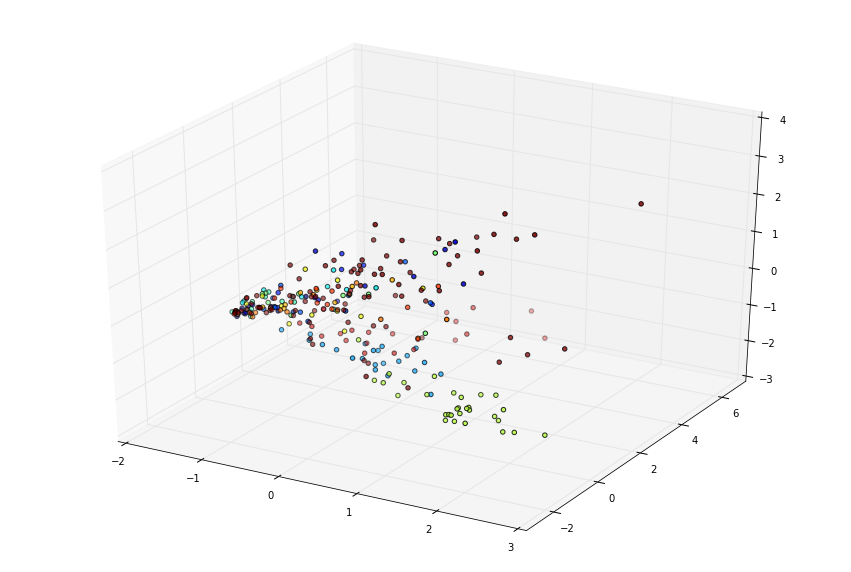

3

In [5]:
from sklearn.decomposition import PCA
#import matplotlib
#matplotlib.use('Gtk3Agg')
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D as plt3d

# pca = PCA(n_components=2)
pca = PCA(n_components=3, whiten=True)
X = pca.fit_transform(arr)

#fig = plt.figure(dpi=1000, figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=integerize(classes))
plt.show()

len(pca.explained_variance_ratio_)

In [19]:
from sklearn.feature_selection import f_classif as funct
from sklearn.feature_selection import SelectFpr as selector

PERCENTILE = .05

X_new = selector(funct,alpha=PERCENTILE).fit_transform(arr, integerize(classes))
X_new.shape

(280, 14252)

In [18]:
# devide data into training and testing
from sklearn import cross_validation
y_test = []
while len(set(y_test)) < 15:
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(arr,integerize(classes),
                                                                     test_size=0.2, random_state=1)
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [17]:
from load_data import load_data
train_values, train_classes, train_classes_binary,\
    test_values, test_classes, test_classes_binary, class_desc = load_data()
    
X_train = train_values
y_train = train_classes
X_test = test_values
y_test = test_classes

/home/madam/School/MLBio/projekt/mccd/load_data.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  train_classes_binary[i, train_classes[i]] = 1
/home/madam/School/MLBio/projekt/mccd/load_data.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  test_classes_binary[i, test_classes[i]] = 1


class count  14
class desc  ['Breast', 'Prostate', 'Lung', 'Colorectal', 'Lymphoma', 'Bladder', 'Melanoma', 'Uterus__Adeno', 'Leukemia', 'Renal', 'Pancreas', 'Ovary', 'Mesothelioma', 'CNS']


train classes  ['0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '10', '10', '10', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '12', '12', '12', '12', '12', '12', '12', '12', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13']
train classes binary  [[1 0 0 ..

In [21]:
from sklearn import svm
#clf = svm.SVC(kernel='sigmoid')
clf = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovr')
clf.fit(X_train,y_train)
#guess = clf.predict(X_test)

clf.score(X_test,y_test)

0.3392857142857143

In [ ]:
# adding feature selection
import time
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

t_start = time.time()
estimator = SVR(kernel='linear')
selector = RFECV(estimator, step=1, cv=5)
selector.fit(X_train, y_train).score(X_test, y_test)
t_end = time.time()
t_end - t_start